  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
      message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


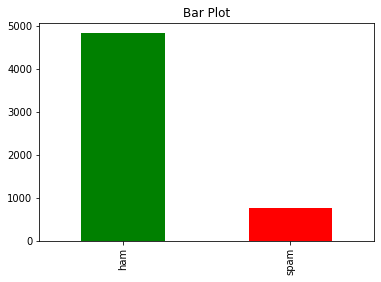

(5572,)
(5572,)
CountVectorizer(stop_words='english')
<bound method CountVectorizer.get_feature_names of CountVectorizer(stop_words='english')>
4251
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1246)	1
  (0, 1726)	1
  (0, 2896)	1
  (0, 3200)	1
  (0, 3556)	1
  (0, 3693)	1
  (0, 3739)	1
  (1, 1913)	1
  (1, 2838)	1
  (1, 3562)	1
  (2, 2710)	1
  (3, 1492)	1
  (3, 4169)	1
  (4, 705)	1
  (4, 1758)	1
  (4, 2292)	1
  (4, 3068)	1
  (4, 3346)	1
  (5, 23)	1
  (5, 24)	1
  (5, 197)	1
  (5, 211)	1
  (5, 1000)	1
  (5, 1606)	1
  (5, 1991)	1
  :	:
  (1666, 1371)	1
  (1666, 1742)	1
  (1666, 1861)	1
  (1666, 2269)	1
  (1666, 4151)	1
  (1666, 4158)	1
  (1667, 2203)	1
  (1667, 2287)	1
  (1667, 3466)	1
  (1668, 1624)	1
  (1668, 1838)	1
  (1668, 2947)	1
  (1668, 3075)	1
  (1668, 3469)	1
  (1668, 3470)	1
  (1669, 2090)	1
  (1669, 2673)	1
  (1669, 3298)	1
  (1669, 3800)	1
  (1670, 1245)	1
  (1670, 2107)	1
  (1670, 2592)	1
  (1670, 3240)	1
  (1670, 3451)	1
  (1670, 3667)	1
MultinomialNB()
[[3348   31]
 [  30  49

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


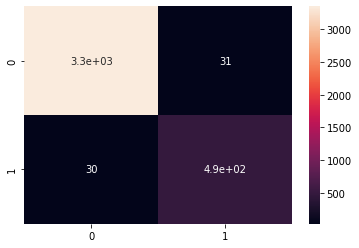

Recall score: 0.9425287356321839
Accuracy score: 0.9843629838502947
F1 score: 0.941626794258373
Precision score: 0.9407265774378585
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3379
           1       0.94      0.94      0.94       522

    accuracy                           0.98      3901
   macro avg       0.97      0.97      0.97      3901
weighted avg       0.98      0.98      0.98      3901



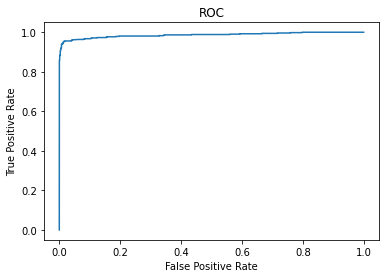

In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# reading the dataset
spam_ham = pd.read_csv('/content/SMSSpamCollection',sep ='\t',names=["label", "message"])
print(spam_ham.head())
print(spam_ham.groupby('label').describe())

#plotting the dataset based on category
count_Class=pd.value_counts(spam_ham["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

spam_ham["label"]=spam_ham["label"].map({'spam':1,'ham':0})

X=spam_ham.message
y=spam_ham.label

print(X.shape)
print(y.shape)


#splitting the dataset between train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(X, y, test_size=0.70, random_state=42)
vector=CountVectorizer(stop_words='english')

print(vector.fit(train_msg))

# print(vector.vocabulary_)  uncomment this line to view the word count
print(vector.get_feature_names)
print(len(vector.get_feature_names()))

train_msg_transfrom = vector.transform(train_msg)
test_msg_transfrom = vector.transform(test_msg)


#trained model
print(type(train_msg_transfrom))
print(train_msg_transfrom)


# Multinomial Naive Bayes classifier
NB_model= MultinomialNB()
print(NB_model.fit(train_msg_transfrom,train_labels))
predict = NB_model.predict(test_msg_transfrom)
predict_prob=NB_model.predict_proba(test_msg_transfrom)


# Report and confusion matrix
print(confusion_matrix(test_labels,predict))
sns.heatmap(confusion_matrix(test_labels,predict),annot=True)
plt.show()

print('Recall score: {}'.format(recall_score(test_labels, predict)))
print('Accuracy score: {}'.format(accuracy_score(test_labels, predict)))
print('F1 score: {}'.format(f1_score(test_labels, predict)))
print('Precision score: {}'.format(precision_score(test_labels, predict)))

print(classification_report(test_labels,predict))

Rate_false_positive, rate_true_positive, thresholds = roc_curve(test_labels, predict_prob[:,1])
roc_auc = auc(Rate_false_positive, rate_true_positive)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(Rate_false_positive, rate_true_positive)
plt.show()